## Setup

NOTE: All dependencies are within a conda environment to ensure reproducibility. To install all dependencies: pip install -r requirements.txt

In [1]:
# import tensorflow.compat.v1 as tf
# #Lets see if tensorflow finds the GPU
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import tensorflow as tf

2023-03-29 10:26:56.850917: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Lets see if it works
# tf.ones(1) + tf.ones(1)

2023-03-26 18:29:54.782908: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-26 18:29:54.783796: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-26 18:29:54.783928: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-26 18:29:54.784019: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative val

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.], dtype=float32)>

In [2]:
import numpy as np
import pandas as pd
import cv2
import random
import h5py
import matplotlib.pyplot as plt
import boto3
from pynwb import NWBHDF5IO
import fsspec
from fsspec.implementations.cached import CachingFileSystem
import requests
import aiohttp
import os
import time
from keras.models import model_from_json
import csv

# import sys
# sys.path.append('/Users/konstantinoskalaitzidis/Developer/dmc/my-gitlab-konkalaitzidis/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks')
# import arrowmaze_project.utils.readSessionsServer as readSessionServer

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import datasets, layers, models

In [ ]:
#os.environ['CUDA_DIR'] = '/usr/lib/cuda/'

In [ ]:
# mySession = readSessionServer.SessionIterator()
# sess = mySession.findSession()
# # for sess in mySession.findSessions():
# #     print(sess)
# if sess.hasBehavior() and sess.hasCalcium():
#     behavior = sess.getBehaviorSegmentation(align_with_calcium=True).reset_index()

## [Ignore for now] Define hyperparameters

In [ ]:
# IMG_SIZE = 224
# BATCH_SIZE = 64
# EPOCHS = 10

# MAX_SEQ_LENGTH = 20
# NUM_FEATURES = 2048

In [ ]:
# import sys
# sys.path.append("/Users/konstantinoskalaitzidis/Developer/dmc")
# from readSessionsServer import SessionIterator

#TODO: Script to retrieve videos from a list of calcium videos (of the same animal) from the db

## Dataset preparation and label annotation (feature engineering)

### [Ignore for now] Data availale for processing - overview

The following is not going to be used for now but will allow us to have an overview of all the videos I have available to train my CNN model. I expect to have all recordings sessions for each animal as input for the CNN which is going to be trained only based on recordings from the corresponding animal. The data will be split to train/test at some point...

In [ ]:
# train_df = pd.read_csv("train.csv")
# test_df = pd.read_csv("test.csv")

# print(f"Total videos for training: {len(train_df)}")
# print(f"Total videos for testing: {len(test_df)}")

# train_df.sample(10)

Extract frames from the calcium imaging video and save to directory. Each frame contains spatial information, and the sequence of those frames contains temporal information (the latter is not exploited for now). Maybe also ask for path input from the user to make it reproducible for others.

Helpful source: https://keras.io/examples/vision/video_classification/

The number of frames may differ from video to video.
The frame rate may also differ from video to video but it should be 20fps for all. 

The duration of each frame depends on the frame rate of the video. If a video has a frame rate of 25 fps, then each frame will have a duration of 1/25th of a second, or approximately 0.04 seconds. The calcium videos use 20fps, while the behavioral recordings are at 60fps. Alignment of these videos will follow shortly. 

### [Ignore for now] Fetch all calcium videos from the dmc database and align calcium videos with behavior annotations

In [ ]:
# mySession = readSessionServer.SessionIterator()
# for sess in mySession.findSessions():
#     print(sess)
    # if sess.hasBehavior() and sess.hasCalcium():
        # behavior = sess.getBehaviorSegmentation(align_with_calcium=True).reset_index()

### [Ignore for now] Open calcium video locally, create dir for saving frames and count number of frames with OpenCV

In [ ]:
# Open the HDF5 file
# with h5py.File('/Users/konstantinoskalaitzidis/Developer/dmc/thesis_data/20211016_163921_animal1learnday1.nwb', 'r') as f:
#     # Print the keys of the file
#     print(list(f.keys()))
#     # dataset = f['identifier'][()]
#     # print(dataset)

In [ ]:
# Directory where frames from video will be stored after extraction
# frames_dir = "path"

In [ ]:
# Open the video using OpenCV and count the number of frames
# cap = cv2.VideoCapture(raw_calcium_video_path)
# frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# cap.release()

# print(f"Number of frames in the video: {frame_count}")

In [ ]:
# video = 'path'

# cap = cv2.VideoCapture(video)
# frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# cap.release()

# print(f"Number of frames in the video: {frame_count}")

In [ ]:
# Open the video file
# cap = cv2.VideoCapture(video)

# # Get the frame rate of the video
# frame_rate = int(cap.get(cv2.CAP_PROP_FPS))

# # Release the video capture object
# cap.release()

# print(f"Frame rate of the video: {frame_rate}")

In [ ]:
# save each frame as one image

In [ ]:
# cap = cv2.VideoCapture(video)

# # Loop through the video frames and save each one as an image file
# frame_count = 0
# while(cap.isOpened()):
#     ret, frame = cap.read()
#     if ret == False:
#         break
#     # Save the frame as an image file
#     frame_file = os.path.join(frames_dir, "frame_" + str(frame_count) + ".jpg")
#     cv2.imwrite(frame_file, frame)
#     frame_count += 1

# # Close the video file
# cap.release()

## [Start here] Align behavior annotation with calcium video frames

At some point I will also have to align the behavior and the calcium imaging videos and use those as input for my CNN model

In [ ]:
# # define paths
# video_path = '/Users/konstantinoskalaitzidis/Developer/dmc/thesis_data/20211016_163921_animal1learnday1.nwb'
# train_dir = '/Users/konstantinoskalaitzidis/Developer/dmc/thesis_data/train'
# test_dir = '/Users/konstantinoskalaitzidis/Developer/dmc/thesis_data/test'

# # define train-test split ratio
# train_test_ratio = 0.8

# # open video file
# cap = cv2.VideoCapture(video_path)

# # get video frame count
# frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# # create list of frame indices
# frame_indices = list(range(frame_count))

# # shuffle frame indices
# random.shuffle(frame_indices)

# # split frame indices into train and test sets
# train_frame_indices = frame_indices[:int(frame_count * train_test_ratio)]
# test_frame_indices = frame_indices[int(frame_count * train_test_ratio):]

# # iterate over frames and save to train or test directory
# for i in range(frame_count):
#     # read frame
#     ret, frame = cap.read()
#     if not ret:
#         break
    
#     # save frame to train or test directory
#     if i in train_frame_indices:
#         cv2.imwrite(os.path.join(train_dir, f'{i}.jpg'), frame)
#     else:
#         cv2.imwrite(os.path.join(test_dir, f'{i}.jpg'), frame)

### [Start here] Loading calcium video

In [3]:
s3_calcium_url = 'https://s3.ki.se/dmc-striatum-arrowmaze/processed-data/miniscope-recordings/export-to-nwb/animal1learnday1/20211016_163921_animal1learnday1.nwb?AWSAccessKeyId=5AMYRX4EUZ0MV0276K24&Signature=f7O9YQxPs3BsvvETWfEJs0Uz6Vo%3D&Expires=1680079376'
#s3_calcium_url = input("Insert url of calcium video here: ")

In [5]:
# Load calcium video from locally
# with h5py.File('path', 'r') as f:
#     video_data = np.array(f['analysis/recording_20211016_163921-PP-BP-MC/data'])

In [4]:
start_time = time.time()


fs = CachingFileSystem(
    fs=fsspec.filesystem("http"),
    cache_storage="nwb-cache",  # Local folder for the cache
)

with fs.open(s3_calcium_url, "rb") as f:
    with h5py.File(f) as file:
        video_data = np.array(file["analysis/recording_20211016_163921-PP-BP-MC/data"])
        

end_time = time.time()
execution_time = end_time - start_time
hours, remainder = divmod(execution_time, 3600)
minutes, seconds = divmod(remainder, 60)

print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Execution time: 0 hours, 7 minutes, 26 seconds


In [5]:
video_data

array([[[166, 173, 175, ..., 179, 179, 176],
        [178, 172, 169, ..., 182, 176, 174],
        [176, 178, 182, ..., 169, 175, 181],
        ...,
        [168, 166, 169, ..., 179, 175, 180],
        [179, 173, 168, ..., 185, 189, 184],
        [182, 174, 170, ..., 195, 190, 185]],

       [[160, 160, 169, ..., 180, 173, 171],
        [160, 160, 174, ..., 185, 181, 183],
        [162, 161, 175, ..., 187, 186, 187],
        ...,
        [176, 174, 172, ..., 175, 174, 182],
        [174, 176, 179, ..., 171, 170, 184],
        [170, 175, 180, ..., 177, 188, 178]],

       [[169, 166, 162, ..., 178, 181, 180],
        [165, 169, 171, ..., 180, 180, 179],
        [167, 171, 172, ..., 176, 180, 177],
        ...,
        [184, 178, 171, ..., 189, 189, 190],
        [181, 178, 178, ..., 170, 185, 184],
        [178, 181, 182, ..., 170, 182, 182]],

       ...,

       [[166, 169, 178, ..., 170, 173, 175],
        [167, 170, 180, ..., 180, 179, 172],
        [175, 171, 177, ..., 178, 173, 171

In [6]:
# Determine the size of the dataset
num_of_frames = video_data.shape[0]
img_height = video_data.shape[1]
img_width = video_data.shape[2]
print("The number of video frames is ", num_of_frames, " and the frame dimensions (height x width) are: ", img_height, "X", img_width)

The number of video frames is  24186  and the frame dimensions (height x width) are:  349 X 374


In [7]:
# Normalize pixel values to be between 0 and 1
max_pixel_value = video_data.max()
normalized_video_data = video_data / max_pixel_value
video_data = normalized_video_data

# Verify the normalization by checking the minimum and maximum values
print('Minimum pixel value:', np.min(video_data))
print('Maximum pixel value:', np.max(video_data))

Minimum pixel value: 0.3870056497175141
Maximum pixel value: 1.0


### Loading bonsai data

In [10]:
#s3_bonsai_url = input("Insert url of bonsai file here: ")
# fs = CachingFileSystem(
#     fs=fsspec.filesystem("http"),
#     cache_storage="nwb-cache",  # Local folder for the cache
# )

# with fs.open(s3_bonsai_url, "rb") as f:
#     with h5py.File(f) as file:
#         bonsai_data = pd.read_csv(s3_bonsai_url, header=None)

In [20]:
# Preparing bonsai data file
bonsai_data_path = '/Users/konstantinoskalaitzidis/Developer/dmc/my-gitlab-konkalaitzidis/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/data/tmaze_2021-10-16T16_39_14.csv'
#bonsai_data_path = input("Insert path of bonsai data file here: ")
bonsai_data = pd.read_csv(bonsai_data_path, header=None)


# Adding column names
bonsai_data = bonsai_data.rename(columns={
    0: 'Time', 1: 'Trial_Number',
    2: 'Reward', 3: 'Frame_Number', 4: 'Central_Zone',
    5: 'L_Zone', 6: 'R_Zone', 7: 'Calcium_frame'})

bonsai_data.head()

,Time,Trial_Number,Reward,Frame_Number,Central_Zone,L_Zone,R_Zone,Calcium_frame
0,2021-10-16T16:39:15.7780992+02:00,0,0,0,False,False,False,0
1,2021-10-16T16:39:15.7956992+02:00,0,0,1,False,False,False,0
2,2021-10-16T16:39:15.8109568+02:00,0,0,2,False,False,False,0
3,2021-10-16T16:39:15.8277632+02:00,0,0,3,False,False,False,0
4,2021-10-16T16:39:15.8442752+02:00,0,0,4,False,False,False,0


### Loading behavior segmentation file

In [21]:
# Loading locally
# with h5py.File('/Users/konstantinoskalaitzidis/Developer/dmc/thesis_data/20211016_163921_animal1learnday1.h5', 'r') as f:
#     print(list(f.keys()))
#     behavior_data = np.array(f['per_frame'])

In [22]:
df_behavior_path = '/Users/konstantinoskalaitzidis/Developer/dmc/my-gitlab-konkalaitzidis/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/data/20211016_163921_animal1learnday1.h5'
#df_behavior_path = input("Insert path of behavioral data file here: ")
df_behavior = pd.read_hdf(df_behavior_path, 'per_frame')
df_behavior.head()

,frame_no,segment_no,state_id,spatial_progress,temporal_progress,state_name
0,0,0,2,0.818486,0.00000,initRight
1,1,0,2,0.125230,0.50000,initRight
2,2,1,0,0.000000,0.00000,initReward
3,3,1,0,0.002890,0.00289,initReward
4,4,1,0,0.005780,0.00578,initReward


### Aligning calcium frame column from the bonsai file with the behavior file

In [23]:
df_aligned = df_behavior.loc[bonsai_data.groupby('Calcium_frame').first()[1:].Frame_Number].reset_index()
df_aligned.head()

,index,frame_no,segment_no,state_id,spatial_progress,temporal_progress,state_name
0,1518,1518,15,23,0.865004,0.953488,rightRight
1,1521,1521,15,23,0.909601,0.988372,rightRight
2,1524,1524,16,20,0.388515,0.014925,rightReturn
3,1527,1527,16,20,0.398498,0.037313,rightReturn
4,1530,1530,16,20,0.414232,0.059701,rightReturn


In [24]:
df_aligned['state_id'].head()

0    23
1    23
2    20
3    20
4    20
Name: state_id, dtype: int64

### Verify the data

In [25]:
# For each calcium video frame, I want to give the state_id value annotation. 
train_images = video_data
train_labels = df_aligned['state_id']

In [26]:
train_labels

0        23
1        23
2        20
3        20
4        20
         ..
24181     0
24182     0
24183     0
24184     0
24185     0
Name: state_id, Length: 24186, dtype: int64

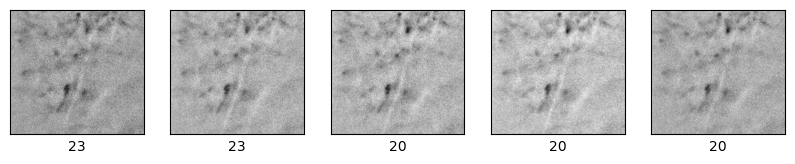

In [27]:
# Let's plot the first 25 images from the training set and display the class name below each image:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [21]:
# # Display the first image in the training set
# plt.imshow(train_images[0], cmap=plt.cm.binary)
# plt.show()

# # Print the label for the first image in the training set
# print(train_labels[0])

In [28]:
train_images

array([[[0.46892655, 0.48870056, 0.49435028, ..., 0.50564972,
         0.50564972, 0.49717514],
        [0.50282486, 0.48587571, 0.47740113, ..., 0.51412429,
         0.49717514, 0.49152542],
        [0.49717514, 0.50282486, 0.51412429, ..., 0.47740113,
         0.49435028, 0.51129944],
        ...,
        [0.47457627, 0.46892655, 0.47740113, ..., 0.50564972,
         0.49435028, 0.50847458],
        [0.50564972, 0.48870056, 0.47457627, ..., 0.52259887,
         0.53389831, 0.51977401],
        [0.51412429, 0.49152542, 0.48022599, ..., 0.55084746,
         0.53672316, 0.52259887]],

       [[0.4519774 , 0.4519774 , 0.47740113, ..., 0.50847458,
         0.48870056, 0.48305085],
        [0.4519774 , 0.4519774 , 0.49152542, ..., 0.52259887,
         0.51129944, 0.51694915],
        [0.45762712, 0.45480226, 0.49435028, ..., 0.52824859,
         0.52542373, 0.52824859],
        ...,
        [0.49717514, 0.49152542, 0.48587571, ..., 0.49435028,
         0.49152542, 0.51412429],
        [0.4

We have 24186 images of dimensions 349x374 and the number 1 demonstrates that images are grayscale.

In [31]:
# Input channel dimension (Greyscale: 1, RGB: 3)
channel_dimension = 1
#channel_dimension = int(input("Input channel dimension (Greyscale: 1, RGB: 3)"))
#Improve in case the user clicks smth else

In [30]:
#train_images = video_data.reshape(num_of_frames, img_height, img_width, channel_dimension)
#train_labels = df_behavior['state_id']

# ensuring that the pixel values are float numbers. This is a common preprocessing step for image data
train_images = train_images.astype('float32')

### Finding number of classes and converting labels to categorical values

# How many distinct behaviors do we have?
no_of_behaviors = len(df_behavior['state_id'].unique())
print(no_of_behaviors)

# Define the number of classes
num_classes = no_of_behaviors

# Converting labels to categorical.
train_labels = to_categorical(train_labels, no_of_behaviors)

26


In [32]:
train_images.shape

(24186, 349, 374)

In [22]:
# class_names = df_behavior['state_id'].unique())

# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i])
#     # The CIFAR labels happen to be arrays, 
#     # which is why you need the extra index
#     plt.xlabel(class_names[train_labels[i][0]])
# plt.show()

## Build the model

Creating a sequential model.
A sequential model is a linear stack of layers, where the output of one layer is the input of the next.

In [ ]:
#model = Sequential()

Add a convolutional layer with 32 filters, a kernel size of 3x3, and a ReLU activation function
The ReLU activation function is a simple equation that takes the input of a neuron and returns the input if it is positive, and returns 0 if it is negative. 

In [ ]:
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 1))) # input is a 28x28 image with 1 color channel.

Add a max pooling layer with a pool size of 2x2
This layer applies a max operation over a 2x2 window of the input, reducing the spatial dimensions of the input by half.

In [ ]:
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Add a convolutional layer with 64 filters, a kernel size of 3x3, and a ReLU activation function
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# # Add a max pooling layer with a pool size of 2x2
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Flatten the output from the previous layers
# model.add(Flatten())

Add a fully connected layer with 128 units and a ReLU activation function. This layer has 128 neurons and it is fully connected to the previous layer

In [ ]:
#model.add(Dense(128, activation='relu'))

Add a final output layer with 26 units and a softmax activation function
The softmax function is used to convert the output of the final layer into probability distribution over 10 possible classes.

In [ ]:
#model.add(Dense(num_classes, activation='softmax'))

## Train the model

In [ ]:
# Define and compile your CNN model here
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train your model here
# model.fit(train_images, train_labels, epochs=10, batch_size=32)


In [33]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, channel_dimension))) # input is a 28x28 image with 1 color channel.

model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a convolutional layer with 64 filters, a kernel size of 3x3, and a ReLU activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add a max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# display model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 347, 372, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 173, 186, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 171, 184, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 85, 92, 64)       0         
 2D)                                                             
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Flatten the output from the previous layers
model.add(Flatten())

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes))

In [38]:
# training parameters
epochs = 10
batch_size = 32
channel_dimension = 1

In [35]:
# # Complete model 
model.summary()

# # save the model architecture to a JSON file
# with open('model_architecture.json', 'w') as f:
#     f.write(model.to_json())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 347, 372, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 173, 186, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 171, 184, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 85, 92, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 500480)            0         
                                                                 
 dropout (Dropout)           (None, 500480)           

In [28]:
# # load the model architecture from the JSON file
# with open('model_architecture.json', 'r') as f:
#     json_string = f.read()

# model_json = model_from_json(json_string)

# # print the loaded model summary
# model.summary()

In [37]:
#Define and compile your CNN model here
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(), metrics=['accuracy'])

In [39]:
start_time = time.time()

model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size)

end_time = time.time()
execution_time = end_time - start_time
hours, remainder = divmod(execution_time, 3600)
minutes, seconds = divmod(remainder, 60)

print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Epoch 1/10
217/756 [=======>......................] - ETA: 13:23 - loss: 8.1881 - accuracy: 0.1973

KeyboardInterrupt: 

In [ ]:
# # save the history object to a CSV file
# with open('training_history.csv', 'w', newline='') as f:
#     writer = csv.writer(f)
#     writer.writerow(['epoch', 'train_loss', 'train_acc', 'val_loss', 'val_acc'])
#     for i, (tl, ta, vl, va) in enumerate(zip(history.history['loss'], history.history['accuracy'],
#                                               history.history['val_loss'], history.history['val_accuracy'])):
#         writer.writerow([i+1, tl, ta, vl, va])

In [ ]:
results = {'Epoch': list(range(1, epochs+1)),
           'Loss': history.history['loss'],
           'Accuracy': history.history['accuracy']}


In [ ]:
results_df = pd.DataFrame.from_dict(results)


In [ ]:
results_df.loc[-1] = [model_json, epochs, batch_size] + [''] * (len(results_df.columns)-3)
results_df.index = results_df.index + 1
results_df = results_df.sort_index()
results_df = results_df.rename(index={0: "Model Architecture and Training Parameters"})


In [ ]:
results_df.to_csv('training_results.csv', index=True)


In [ ]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history.csv', index=False)

### Reflect on the results

1. Insufficient data? One calcium video of 24186 frames and with 349x374 dimensions.
2. Model architecture not appropriate. Try increasing the number of layers or filters, or adding more complex layers like BatchNormalization, Dropout, or Conv2DTranspose.
3. Incorrect data preprocessing
4. Incorrect hyperparameters
5. Class Imbalance (do oversampling, or undersampling)

### [Ignore for now]

In [22]:
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, channel_dimension)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# reshape train_images to have 4 dimensions
train_images = np.expand_dims(train_images, axis=-1)

# Reshape train_images to have 4 dimensions
#train_images = np.squeeze(train_images)
# train_images = np.squeeze(train_images, axis=-1)
# train_images = np.squeeze(train_images, axis=-1)
# train_images = np.squeeze(train_images, axis=-1)
# train_images = np.expand_dims(train_images, axis=-1)


# Data augmentation
train_datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, 
                                   shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')

history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=batch_size),
                    epochs=epochs,
                    steps_per_epoch=len(train_images) // batch_size,
                    shuffle=True)

Epoch 1/10


2023-03-26 18:32:05.388967: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-03-26 18:32:06.747143: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-26 18:32:06.859706: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f3bdcf50dd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-26 18:32:06.859767: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-03-26 18:32:07.078732: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-26 18:32:07.776029: W tensorflow/compiler/xla/service/gpu/nvptx_helper.cc:56] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in co

InternalError: Graph execution error:

Detected at node 'StatefulPartitionedCall_20' defined at (most recent call last):
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/asyncio/base_events.py", line 1906, in _run_once
      handle._run()
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_857187/3081691757.py", line 47, in <module>
      history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=batch_size),
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
      self.apply_gradients(grads_and_vars)
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_20'
libdevice not found at ./libdevice.10.bc
	 [[{{node StatefulPartitionedCall_20}}]] [Op:__inference_train_function_3056]